In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
#importing data
data_specifications = pd.read_excel('question_1_2.xlsx', sheet_name = "Specifications", header=0, skiprows = [0] )
data_production_sequence = pd.read_excel('question_1_2.xlsx', sheet_name = "Production_Sequence", header=0, skiprows = [0] )
data_measurements = pd.read_excel('question_1_2.xlsx', sheet_name = "Measurements", header=0, skiprows = [0] )

**To calculate the mean and standard deviation of product height and weight based on each product code**

In [13]:

mean_values = data_measurements.groupby('Product Code')['T_Height', 'T_Weight'].mean()
std_values = data_measurements.groupby('Product Code')['T_Height', 'T_Weight'].std()

print("Mean\n", mean_values)
print("\nStandard Deviation\n", std_values)

Mean
               T_Height  T_Weight
Product Code                    
LIF001_B       8.94075  384.9100
LIF001_Y      10.26850  382.8250
LIF002_R       9.30775  314.7225
LIF002_Y       8.18975  523.7950

Standard Deviation
               T_Height   T_Weight
Product Code                     
LIF001_B      0.262551   0.323316
LIF001_Y      0.852276   7.287700
LIF002_R      0.893526  17.176708
LIF002_Y      0.452906   6.458506


<ipython-input-13-9913e53a6da7>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_values = data_measurements.groupby('Product Code')['T_Height', 'T_Weight'].mean()
<ipython-input-13-9913e53a6da7>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  std_values = data_measurements.groupby('Product Code')['T_Height', 'T_Weight'].std()


**To Find out which product family produces higher number of defective parts.**

Considering defect as any unit with measurement greater than upper limit

In [14]:
# Extracting height and weight data from specifications table

height_data = data_specifications[data_specifications['T_Name'] == 'T_height']
weight_data = data_specifications[data_specifications['T_Name'] == 'T_weight']

In [15]:
# Creating a dictionary that will store all the product families along with their defect count

unique_product_family = data_production_sequence['Product Family'].unique()
dict = {value: 0 for value in unique_product_family}

# Calculating defects and storing in dictionary

for i in range(0,len(data_measurements)):
  product_code = data_measurements['Product Code'][i]
  if(data_measurements['T_Height'][i]>height_data.loc[height_data['Product Code'] == product_code, 'USL'].values[0]) or (data_measurements['T_Weight'][i]>weight_data.loc[weight_data['Product Code'] == product_code, 'USL'].values[0]) :
    dict[product_code.split('_')[0]] +=1

print(dict)

# To print the product family with maximum defects

key_with_max_value = max(dict, key=dict.get)
print(key_with_max_value)


{'LIF001': 3, 'LIF003': 0, 'LIF002': 5}
LIF002


In [18]:
dict = {k: v for k, v in dict.items() if v != 0}
print(dict)

{'LIF001': 3, 'LIF002': 5}


**Plotting a Pareto chart to identify which product family produces higher defects**

In [20]:
df = pd.DataFrame.from_dict(dict, orient='index', columns=['Defects']).reset_index()
df.columns = ['Product Family', 'Defect Count']

print(df)

  Product Family  Defect Count
0         LIF001             3
1         LIF002             5


Product Family
LIF002     62.5
LIF001    100.0
Name: Defect Count, dtype: float64


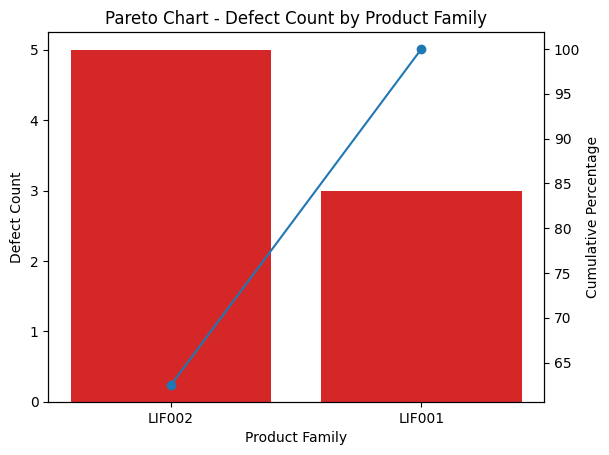

In [21]:
# Sorting the dataframe in the descending order of defect count
defective_counts_sorted = df.groupby('Product Family')['Defect Count'].sum().sort_values(ascending=False)

# Calculating cumulative percentage of each product family to plot the line graph
cumulative_percentage = defective_counts_sorted.cumsum() / defective_counts_sorted.sum() * 100
print(cumulative_percentage)

#Plot the Pareto chart
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(defective_counts_sorted.index, defective_counts_sorted, color='tab:red')
ax2.plot(defective_counts_sorted.index, cumulative_percentage, color='tab:blue', marker='o')

ax1.set_xlabel('Product Family')
ax1.set_ylabel('Defect Count')
ax2.set_ylabel('Cumulative Percentage')

plt.title('Pareto Chart - Defect Count by Product Family')

plt.xticks(rotation=90)
plt.show()


**Observations**

*   The highest defects are produced by LIF002 Product Family
*   For the product family "LIF002", the cumulative percentage of 62.5 means that this product family alone contributes to 62.5% of the total defects.

*   For the product family "LIF001", we can conclude that it contributes to 37.5% of the total defects.


**To determine which of the two product families show better process control for variant Y**

**Process Capability Indices**

It is the measure of how well a process is capable of meeting specifications. We can use two parameters to determine this - cp and cpk

**Cp (Process Capability Index)**

It compares the spread of process to the width of specification limit. It indicates the ability of the process to consistently produce output that falls within the specified range or limits. Cp = Specification width/ process capabilities i.e cp = (USL - LSL)/ 6*SD

**CpK (Process Capability Index wrt specification limit)**

It indicates how well the process is centered between the the upper and lower specification limit. CpK = min[(USL- mean)/3SD, (mean- LSL)/3SD]

 Cp values greater than 1 indicate that the process is capable of producing within the specification limits, while Cp values less than 1 indicate potential issues with meeting the specifications.

In [ ]:
# calculating Cp value of height for LIF001_Y
USL_height = data_specifications.loc[(data_specifications['Product Code'] == 'LIF001_Y') & (data_specifications['T_Name'] == 'T_height'), 'USL'].values[0]
LSL_height = data_specifications.loc[(data_specifications['Product Code'] == 'LIF001_Y') & (data_specifications['T_Name'] == 'T_height'), 'LSL'].values[0]
# As calculated in question 1 , Standard deviation of height for 'LIF001_Y' is 0.852276 , Mean is 10.26850
Cp_height = (USL_height-LSL_height)/(6*0.852276)
CpK_height = min(((USL_height-10.26850)/(3*0.852276)), ((10.26850- LSL_height)/(3*0.852276)))


# calculating Cp value of weight for LIF001_Y
USL_weight = data_specifications.loc[(data_specifications['Product Code'] == 'LIF001_Y') & (data_specifications['T_Name'] == 'T_weight'), 'USL'].values[0]
LSL_weight = data_specifications.loc[(data_specifications['Product Code'] == 'LIF001_Y') & (data_specifications['T_Name'] == 'T_weight'), 'LSL'].values[0]
# As calculated in question 1 , Standard deviation of height for 'LIF001_Y' is 7.287700 , Mean is 382.8250
Cp_weight = (USL_weight-LSL_weight)/(6*7.287700)
CpK_weight = min(((USL_weight-382.8250)/(3*7.287700)), ((382.8250- LSL_weight)/(3*7.287700)))

print("LIF001_Y")
print("Cp values:", Cp_height, Cp_weight)
print("CpK values:",CpK_height, CpK_weight)
worst_case_Cp_value = min(Cp_height, Cp_weight)
worst_case_CpK_value = min(CpK_height, CpK_weight)
print("Cp", worst_case_Cp_value,"CpK", worst_case_CpK_value )


LIF001_Y
Cp values: 0.643375307216598 3.910698848745146
CpK values: -0.07763525743616669 2.4619107079965783
Cp 0.643375307216598 CpK -0.07763525743616669


In [ ]:
# calculating Cp value of height for LIF002_Y
USL_height = data_specifications.loc[(data_specifications['Product Code'] == 'LIF002_Y') & (data_specifications['T_Name'] == 'T_height'), 'USL'].values[0]
LSL_height = data_specifications.loc[(data_specifications['Product Code'] == 'LIF002_Y') & (data_specifications['T_Name'] == 'T_height'), 'LSL'].values[0]
# As calculated in question 1 , Standard deviation of height for 'LIF002_Y' is 0.452906, Mean is 8.18975
Cp_height = (USL_height-LSL_height)/(6*0.452906)
CpK_height = min(((USL_height-8.18975)/(3*0.452906)), ((8.18975- LSL_height)/(3*0.452906)))



# calculating Cp value of weight for LIF001_Y
USL_weight = data_specifications.loc[(data_specifications['Product Code'] == 'LIF002_Y') & (data_specifications['T_Name'] == 'T_weight'), 'USL'].values[0]
LSL_weight = data_specifications.loc[(data_specifications['Product Code'] == 'LIF002_Y') & (data_specifications['T_Name'] == 'T_weight'), 'LSL'].values[0]
# As calculated in question 1 , Standard deviation of height for 'LIF002_Y' is 6.458506, Mean is 523.7950
Cp_weight = (USL_weight-LSL_weight)/(6*6.458506)
CpK_weight = min(((USL_weight-523.7950)/(3*6.458506)), ((523.7950- LSL_weight)/(3*6.458506)))

print("LIF002_Y")
print("Cp values:", Cp_height, Cp_weight)
print("CpK values:",CpK_height, CpK_weight)
worst_case_Cp_value = min(Cp_height, Cp_weight)
worst_case_CpK_value = min(CpK_height, CpK_weight)
print("Cp", worst_case_Cp_value,"CpK", worst_case_CpK_value )


LIF002_Y
Cp values: 1.2107000864049788 4.412785247857632
CpK values: 1.0375589342306497 -1.2280961985119552
Cp 1.2107000864049788 CpK -1.2280961985119552


**Observations**

* Since Cp value of second family is higher as compared to the first family, it indicates that second family has a better process capability in terms of meeting the specifications.
* Since CpK value for both the families is less than 1, it indicates that neither of them is capable of meeting the specifications and improvement efforts are needed.
* In order to determine the product family with a better process control, we can conclude that first product family has a relatively better process control, though its Cp value is less than the second family, its higher CpK value suggests that it has better process centering and smaller deviation from target value.










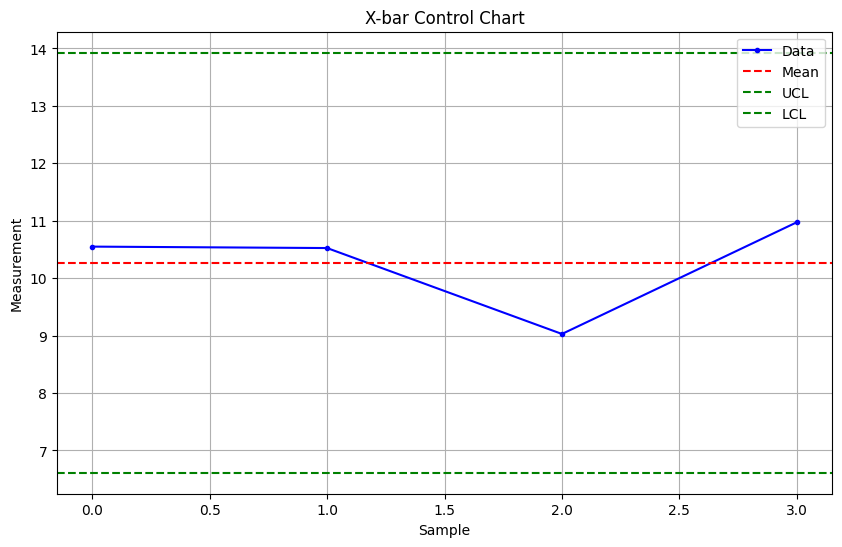

In [ ]:
# X Bar Control Chart for height of LIF001_Y
data = data_measurements.loc[(data_measurements['Product Code'] == 'LIF001_Y'), 'T_Height']
data.reset_index(drop=True, inplace=True)
mean = data.mean()
range = data.max() - data.min()

# Calculate the control limits
UCL = mean + (1.880 * range)
LCL = mean - (1.880 * range)

plt.figure(figsize=(10, 6))
plt.plot(data, 'bo-', markersize=3, label='Data')
plt.axhline(mean, color='r', linestyle='--', label='Mean')
plt.axhline(UCL, color='g', linestyle='--', label='UCL')
plt.axhline(LCL, color='g', linestyle='--', label='LCL')
plt.xlabel('Sample')
plt.ylabel('Measurement')
plt.title('X-bar Control Chart')
plt.legend()
plt.grid(True)
plt.show()

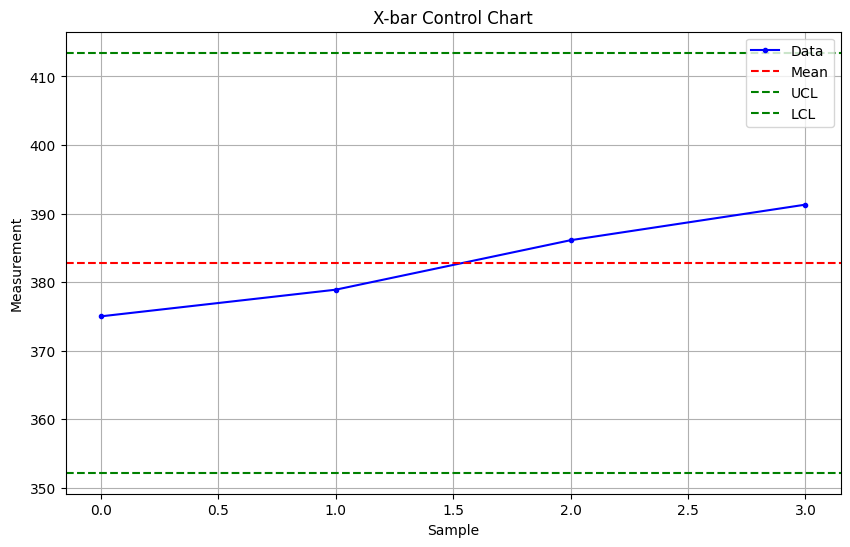

In [ ]:
# X Bar Control Chart for weight of LIF001_Y
data = data_measurements.loc[(data_measurements['Product Code'] == 'LIF001_Y'), 'T_Weight']
data.reset_index(drop=True, inplace=True)
mean = data.mean()
range = data.max() - data.min()

# Calculate the control limits
UCL = mean + (1.880 * range)
LCL = mean - (1.880 * range)

plt.figure(figsize=(10, 6))
plt.plot(data, 'bo-', markersize=3, label='Data')
plt.axhline(mean, color='r', linestyle='--', label='Mean')
plt.axhline(UCL, color='g', linestyle='--', label='UCL')
plt.axhline(LCL, color='g', linestyle='--', label='LCL')
plt.xlabel('Sample')
plt.ylabel('Measurement')
plt.title('X-bar Control Chart')
plt.legend()
plt.grid(True)
plt.show()

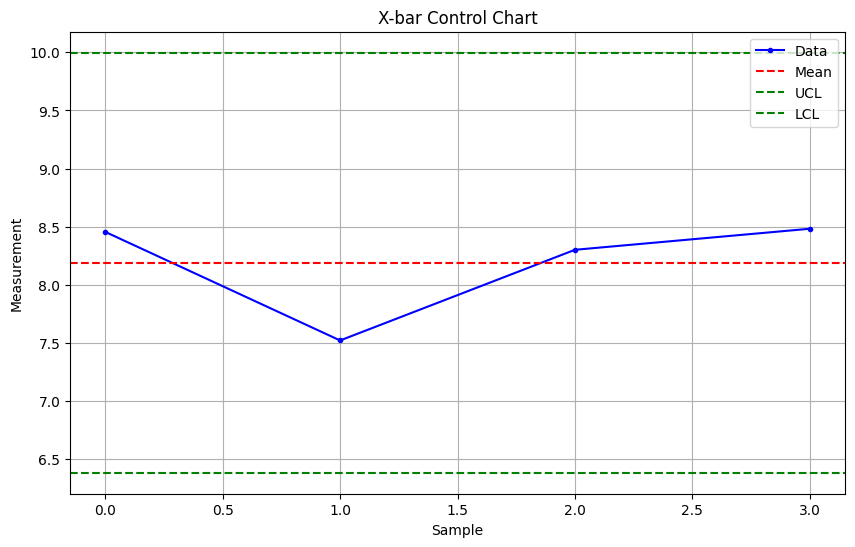

In [ ]:
# X Bar Control Chart for height of LIF002_Y
data = data_measurements.loc[(data_measurements['Product Code'] == 'LIF002_Y'), 'T_Height']
data.reset_index(drop=True, inplace=True)
mean = data.mean()
range = data.max() - data.min()

# Calculate the control limits
UCL = mean + (1.880 * range)
LCL = mean - (1.880 * range)

plt.figure(figsize=(10, 6))
plt.plot(data, 'bo-', markersize=3, label='Data')
plt.axhline(mean, color='r', linestyle='--', label='Mean')
plt.axhline(UCL, color='g', linestyle='--', label='UCL')
plt.axhline(LCL, color='g', linestyle='--', label='LCL')
plt.xlabel('Sample')
plt.ylabel('Measurement')
plt.title('X-bar Control Chart')
plt.legend()
plt.grid(True)
plt.show()

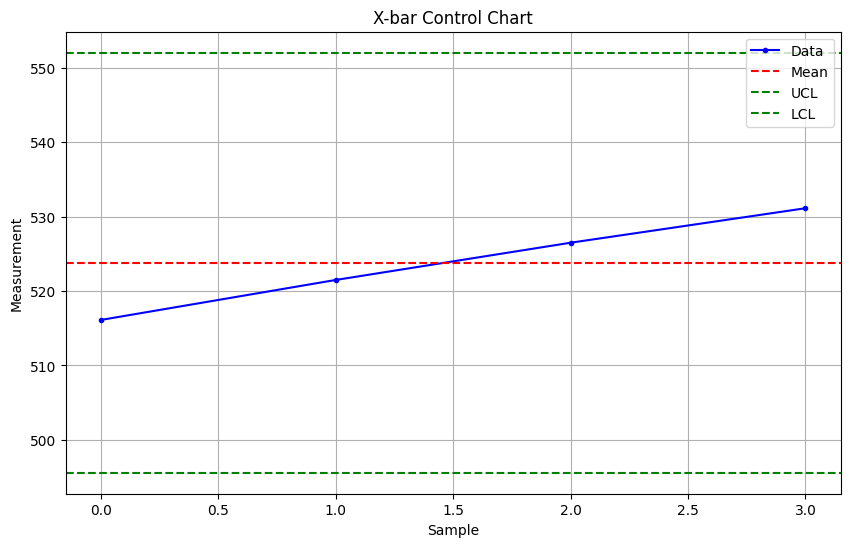

In [ ]:
# X Bar Control Chart for weight of LIF002_Y
data = data_measurements.loc[(data_measurements['Product Code'] == 'LIF002_Y'), 'T_Weight']
data.reset_index(drop=True, inplace=True)
mean = data.mean()
range = data.max() - data.min()

# Calculate the control limits
UCL = mean + (1.880 * range)
LCL = mean - (1.880 * range)

plt.figure(figsize=(10, 6))
plt.plot(data, 'bo-', markersize=3, label='Data')
plt.axhline(mean, color='r', linestyle='--', label='Mean')
plt.axhline(UCL, color='g', linestyle='--', label='UCL')
plt.axhline(LCL, color='g', linestyle='--', label='LCL')
plt.xlabel('Sample')
plt.ylabel('Measurement')
plt.title('X-bar Control Chart')
plt.legend()
plt.grid(True)
plt.show()

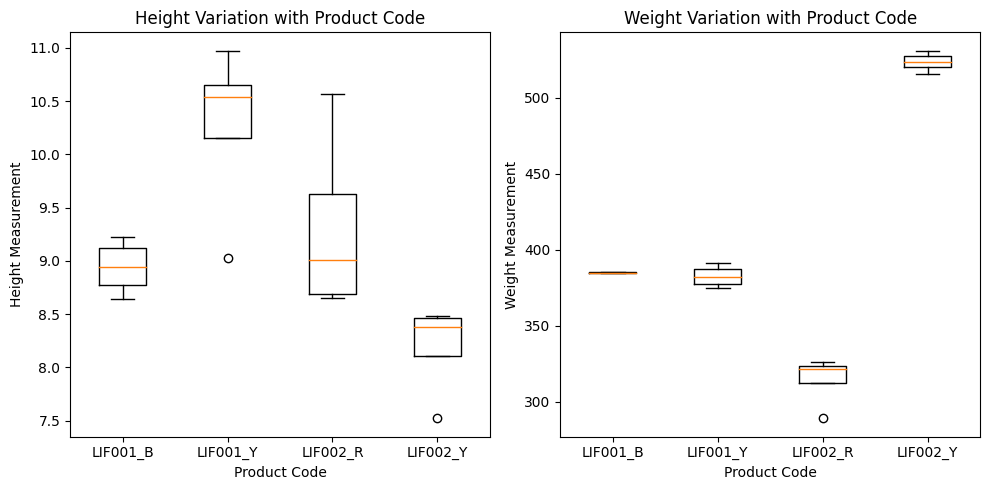

In [26]:
#Trying to plot boxplot for Product Families LIF001_Y, and LIF002_Y to check variability

grouped_data_height = data_measurements.groupby('Product Code')['T_Height'].apply(list)
grouped_data_weight = data_measurements.groupby('Product Code')['T_Weight'].apply(list)

product_code = grouped_data_height.index.tolist()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.boxplot(grouped_data_height)

ax1.set_xticklabels(product_code)

ax1.set_xlabel('Product Code')
ax1.set_ylabel('Height Measurement')
ax1.set_title('Height Variation with Product Code')

ax2.boxplot(grouped_data_weight)

ax2.set_xticklabels(product_code)

ax2.set_xlabel('Product Code')
ax2.set_ylabel('Weight Measurement')
ax2.set_title('Weight Variation with Product Code')

# Adjust spacing between subplots
plt.tight_layout()

plt.show()

**Observations**

Variations in height and weight for LIF001_Y and LIF002_Y

Height Variation: 

* Height measurements for LIF001_Y has a higher variability compared to LIF002_Y.

Weight Variation:

* The observations indicate that the variability of weight data is similar for both product families (LIF001_Y and LIF002_Y). However, it seems that the variability of LIF001_Y is slightly higher than that of LIF002_Y.


**Visualizing how height and weight measurements are varying between lots**

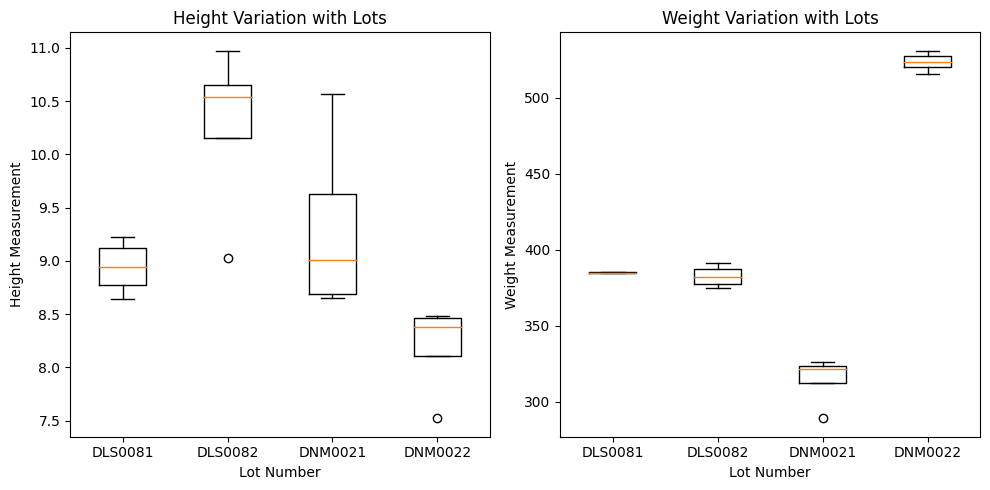

In [24]:
# Plotting box plot for variations of height and weight with Lot No
grouped_data_height = data_measurements.groupby('Lot No')['T_Height'].apply(list)
grouped_data_weight = data_measurements.groupby('Lot No')['T_Weight'].apply(list)

lot_numbers = grouped_data_height.index.tolist()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.boxplot(grouped_data_height)

ax1.set_xticklabels(lot_numbers)

ax1.set_xlabel('Lot Number')
ax1.set_ylabel('Height Measurement')
ax1.set_title('Height Variation with Lots')

ax2.boxplot(grouped_data_weight)

ax2.set_xticklabels(lot_numbers)

ax2.set_xlabel('Lot Number')
ax2.set_ylabel('Weight Measurement')
ax2.set_title('Weight Variation with Lots')

# Adjust spacing between subplots
plt.tight_layout()

plt.show()


**Observations**

Height variation -

*   We have outliers for data with respect to Lot Number DLS0082,and DNM0022
*   Data for Lot Number DLS0081 is evenly distributed.
*   There are height measurements in lot Number DLS0082 that lie beyond the range of the majority of observations.
*   Data with respect to Lot Number DLS0082, and DNM0021 exhibits more variation in data

Weight variation -

*   We have outliers for data with respect to Lot Number DNM0021
*   Data for Lots DLS0081, DLS0082, DNM0022 is symetrically distributed around the median
*   Data in DNM0021 indicates skewness in data










In [ ]:
unique_product_family = data_production_sequence['Product Family'].unique()
dict = {value: 0 for value in unique_product_family}

for i in range(0,len(data_measurements)):
  product_code = data_measurements['Product Code'][i]
  if(data_measurements['T_Height'][i]>height_data.loc[height_data['Product Code'] == product_code, 'USL'].values[0] ) or (data_measurements['T_Weight'][i]>weight_data.loc[weight_data['Product Code'] == product_code, 'USL'].values[0] ) or (data_measurements['T_Height'][i]<height_data.loc[height_data['Product Code'] == product_code, 'LSL'].values[0] ) or (data_measurements['T_Weight'][i]<weight_data.loc[weight_data['Product Code'] == product_code, 'LSL'].values[0]) :
    dict[product_code.split('_')[0]] +=1

print(dict)


{'LIF001': 3, 'LIF003': 0, 'LIF002': 8}


In [ ]:
df = data_measurements.copy()
df['Product Family'] = [i.split('_')[0] for i in data_measurements['Product Code']]
df['Defect Count'] = df['Product Family'].map(dict)

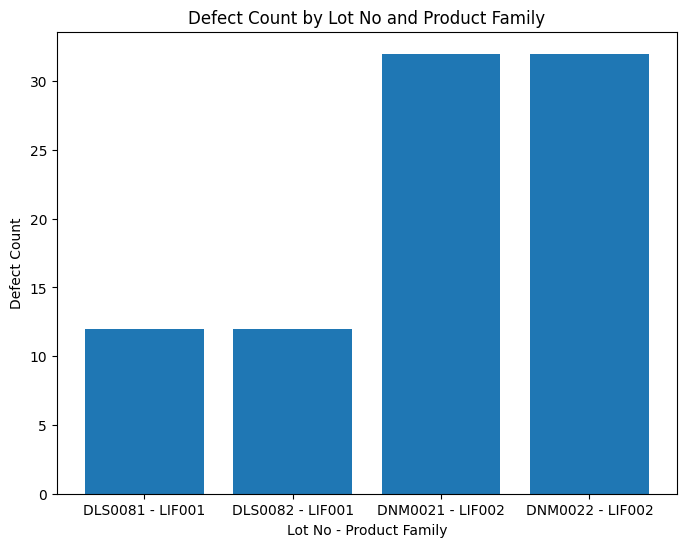

In [ ]:
# Grouping and aggregating the defect counts
grouped_df = df.groupby(['Lot No', 'Product Family'])['Defect Count'].sum()

# Resetting the index
grouped_df = grouped_df.reset_index()

# Creating a bar chart
plt.figure(figsize=(8, 6))
plt.bar(x=grouped_df.index, height=grouped_df['Defect Count'])
plt.xticks(grouped_df.index, grouped_df['Lot No'] + ' - ' + grouped_df['Product Family'])
plt.xlabel('Lot No - Product Family')
plt.ylabel('Defect Count')
plt.title('Defect Count by Lot No and Product Family')
plt.show()


Considering the given data, it is challenging to project the test variations for future orders 7 and 8 due to the following reasons:


*  There is no specific time frame or historical data provided.Statistical analysis on historical data is necessary for accurate projections.
*  The sample size used to determine LSL and USL values is not mentioned. A larger sample size generally provides more reliable projections and better estimation of future test variations.
* External factors such as manufacturing processes, supplier quality, equipment calibration, or environmental conditions can also influence test variations and without considering these factors, projections may not be accurate.